# Initial Value Problems

An initial value problem is an ordinary differential equation of the form $y'(t) = f(y, t)$ with $y(0) = c$, where $y$ can be a single or muliti-valued.

The idea is that you specifty the starting point of a system and the rules that govern the system, and let the simulation go from there.

## Your Zebra Sanctuary

Let's say you are really enthusiastic about zebras.

<p><a href="https://commons.wikimedia.org/wiki/File:Grevy%27s_Zebra_Stallion.jpg#/media/File:Grevy's_Zebra_Stallion.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Grevy%27s_Zebra_Stallion.jpg" alt="Grevy's Zebra Stallion.jpg" style="height:300px;"></a>
<br>
<center>By <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/rainbirder/">Rainbirder</a> - <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/rainbirder/5299622573/">Grevy's Zebra Stallion</a>, <a href="https://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=13267554">Link</a></center></p>

You decide to start a zebra sanctuary in your backyard.  Soon you have a bunch of zebras having a great time eating your grass and shrubbery.

### A Growing Problem

Your zebras keep having babies.  This is manageable for now, and the baby zebras are cute.  However, you're a bit worried about the number of zerbas you're going to need to feed, and you want to figure out what will happen if you let things go unchecked.  Naturally, you decide to write a program to simulate your zebra problem.

Let's say you have $z_0$ zebras this month. The number of zebra babies that will appear next month is proportional to the current population, so 
\begin{equation}
z_1 = z_0 + \Delta(z_0)
\end{equation}
where $\Delta(z_0) = \alpha z_0$.  You estimate $\alpha$ is about $0.02$. 

We can write this as a differential equation
\begin{equation}
z'(t) = \alpha z(t)
\end{equation}

Now it is time to fire up your Python interpreter.  We'll use `solve_ivp` in `scipy.integrate` - this is a high-level wrapper with lots of options for solving initial value problems.  The important arguments to provide are:
* `f(t, y)` - a Python function that returns the right-hand side of the ODE - this can be a multivalued function
* `t_span` - a tuple `(t0, t1)` which gives the start and end times of the simulation
* `y0` - the state of the system at `t0`

`solve_ivp` will do a lot of work for you - deciding on a backend algorithm, chooing time steps, etc.  You might find it useful to specify `t_eval`, which gives an array of points to evaluate the function on.

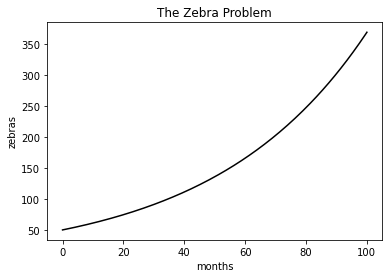

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

z0 = np.array([50])
alpha = 0.02

f = lambda t, z : alpha * z
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

sol = solve_ivp(f, t_span, z0, t_eval=t_eval)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("The Zebra Problem")
plt.ylabel("zebras")
plt.xlabel("months")
plt.show()

Things do not look good.  There is no way you can afford to feed even 100 zerbas while paying tuition at the University of Chicago.  Hard choices will need to be made.

### A Natural Solution

When posting a "Zebras for sale" ad on craigslist, you see an add for a family of lions that need a home.  You feel bad for the lions, and realize you can use them to solve your zebra problem.  However, before commiting, you want to make sure the lions won't eat all the zebras (you just want to keep the population controlled, not exterminated).  You read a bit about how lions and zebras might interact and decide to use a [Predator-Prey model](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).  
1. Zebras will continue to have babies at rate $\alpha$.
2. A lion will catch and eat every $100$th zebra it sees.  The number of zebras a lion sees depends on the zebra population, we'll denote the rate at which a lion encounters a single zebra in a month as $\beta$.
3. For every 5 zebras the lions eat, a lion baby is born.  
4. Lions die of old age at a rate of $\gamma$

We'll use $x$ to denote the number of lions, and $z$ for the number of zebras.  Now, the amount the zebra population changes every month is $\Delta_z(z,x) = \alpha z - \frac{\beta}{100} x z$.  The amount the lion population changes every month is $\Delta_x(x,z) = \frac{\beta}{500} x z - \gamma x$.  

In order to solve this problem, we can use a vector $y = [x, z]^T$, and the following ODE system:
\begin{equation}
y_0'(t) = \frac{\beta}{500} y_0 y_1 - \gamma y_0\\
y_1'(t) = \alpha y_1 - \frac{\beta}{100} y_0 y_1
\end{equation}

You estimate $\gamma$ to be $0.02$, and $\beta$ to be $1.0$.

You plan to start with 5 lions and 50 zebras.

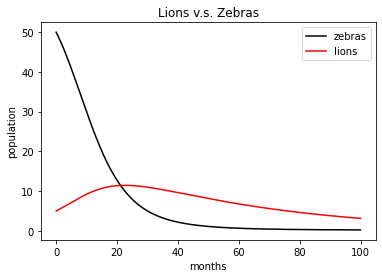

In [2]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 1.0
gamma = 0.02

y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 100, 200)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)

    
plt.plot(sol.t, sol.y[1], label="zebras", c='k')
plt.plot(sol.t, sol.y[0], label="lions", c='r')
plt.title("Lions v.s. Zebras")
plt.ylabel("population")
plt.xlabel("months")
plt.legend()
plt.show()

Oh no!  Soon the zebras will be eaten, and you'll be left with a pack of hungry lions.  You wonder what would happen if you do some landscaping to make it easier for the zebras to hide.  Then you might have $\beta = 0.3$.

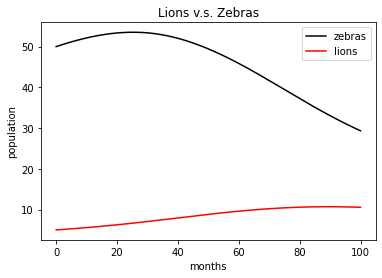

In [3]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 0.3
gamma = 0.02

y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 100, 200)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)

    
plt.plot(sol.t, sol.y[1], label="zebras", c='k')
plt.plot(sol.t, sol.y[0], label="lions", c='r')
plt.title("Lions v.s. Zebras")
plt.ylabel("population")
plt.xlabel("months")
plt.legend()
plt.show()

That looks a bit better - what if we run the simulation for longer?

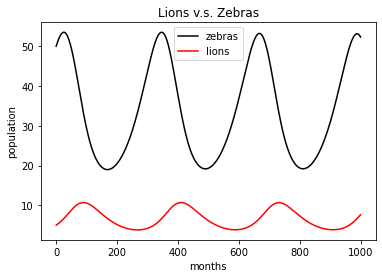

In [4]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 0.3
gamma = 0.02


y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 1000, 2000)
t_span = (0, 1000)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)

    
plt.plot(sol.t, sol.y[1], label="zebras", c='k')
plt.plot(sol.t, sol.y[0], label="lions", c='r')
plt.title("Lions v.s. Zebras")
plt.ylabel("population")
plt.xlabel("months")
plt.legend()
plt.show()

This seems like a good solution - you install some hiding places for zebras, and give the lions a home.  You start charging interested visitors for tours, and open a gift shop.  Soon you are able to cover the expenses for the zerba hay.  You quit your day job and become a safari guide in your own backyard.

### Exercises

1. Come up with agent-based models for the zebra growth model and lion-zebra predator-prey model.  How do these compare to the ODE models in terms of speed?

In [5]:
## Your code here


## Symbolic Solutions of ODEs

You can use SymPy for symbolic solutions of ODEs.  For instance, in our zebra growth problem, we had an ODE of the form
\begin{equation}
y'(t) = a y(t)
\end{equation}
We can use SymPy to classify the ODEs and find a symbolic solution (if one exists)

In [6]:
import sympy as sym
from sympy.solvers import ode

In [7]:
a, t = sym.symbols('a t') # symbol
y = sym.Function('y') # symbolic function
eqn = y(t).diff(t) - a * y(t) # eqn = 0
eqn

-a*y(t) + Derivative(y(t), t)

In [8]:
ode.classify_ode(eqn)

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral')

You might recognize some of the above from an ODE class. We see that this ODE is fairly simple, and a variety of methods might be used to solve the equation symbolicly.

In [9]:
ode.dsolve(eqn, hint='separable') # we solve the differential equation using the hinted method

Eq(y(t), C1*exp(a*t))

If you have taken a class on ODEs, hopefully this looks correct.  If you don't remember your ODEs, or haven't seen them before, try verifying that the solution satisfies `y'(t) = a * y(t)`

### The Logistic Equation

Another ODE is the Logistic equation
\begin{equation}
y'(t) = y(t) (1 - y(t))
\end{equation}

This models growth of a population with resource limits. 

First, let's use SymPy to find a symbolic solution

In [10]:
t = sym.symbols('t') # symbol
y = sym.Function('y') # symbolic function
eqn = y(t).diff(t) - y(t) * (1 - y(t))
eqn

-(1 - y(t))*y(t) + Derivative(y(t), t)

In [11]:
ode.classify_ode(eqn)

('separable',
 '1st_exact',
 'Bernoulli',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [12]:
f = ode.dsolve(eqn, hint='separable')
f

Eq(y(t), 1/(C1*exp(-t) + 1))

Let's just set the constant $C_1$ to be 1

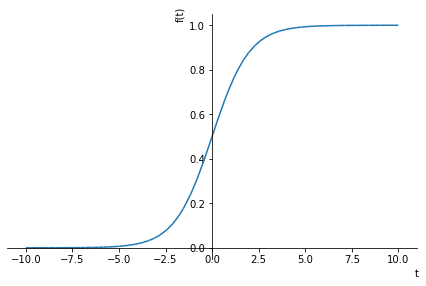

In [13]:
exp = 1 / (sym.exp(-t) + 1)
sym.plot(exp)

Let's look at solving the ODE with $y(0) = 0.1$ .  We can pass this into SymPy's `ode.dsolve` using the `ics` keyword:

In [14]:
f = ode.dsolve(eqn, hint='separable', ics={y(0): 0.1})
f

Eq(y(t), 1/(1 + 9.0*exp(-t)))

now, because we actually solved the IVP, there are no constants to fill in, and we can plot the right hand side of the equation:

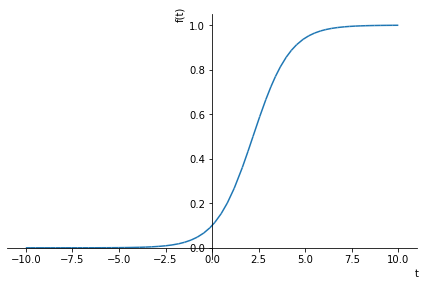

In [15]:
sym.plot(f.rhs)

Now, let's solve the IVP numerically using `scipy`

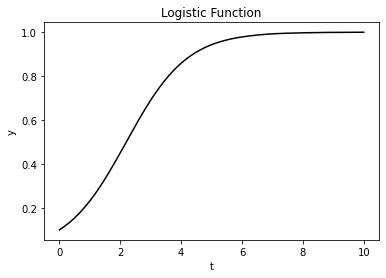

In [16]:
y0 = np.array([0.1])

f = lambda t, y : y * (1 - y)
t_span = (0, 10)
t_eval = np.linspace(0,10, 200)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("Logistic Function")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

### Exercises

1. Get an exact expression for the zebra growth IVP using SymPy.  What is the worst-case error over the 100-month simulation we conducted?

In [25]:
t = sym.symbols('t') # symbol
Z = sym.Function('Z') # symbolic function
eqn = Z(t).diff(t) - 0.02*Z(t) #alpha=0.02
f = ode.dsolve(eqn, hint='separable', ics={Z(0): 50})
f

Eq(Z(t), 50*exp(0.02*t))

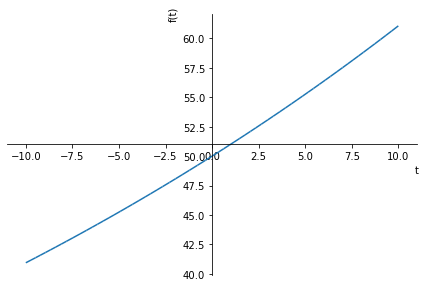

In [29]:
sym.plot(f.rhs)
plt.show()

When $t=100$, $Z(100)=50e^{0.02\times100}=369.45$, and the number of zebra is 369. From the numerical solutions of ODE above, we see the real number of zebras (when `t=100`) is a 2-digit number, which is a lot less than the case that existence of lions is not included. 

## Euler Method

The [(forward) Euler Method](https://en.wikipedia.org/wiki/Euler_method) is a numerical method for solving Initial Value Problems.  The basic idea is to choose a step size `h`, and iteratively compute `y(t0), y(t0+h), y(t0+2h), ...` using `y(t0 + (k+1)h) = y(t0 + kh) + h f(t, y(t0 + hk))`

Here's an example implementation

In [18]:
def forward_euler(f, y0, t0=0, h=1e-2, n=100):
    """
    compute n forward euler steps
    """
    y = [y0]
    t = [t0]
    for k in range(n-1):
        fk = f(t[-1], y[-1])
        y.append(y[-1] + h*fk)
        t.append(t[-1]+h)
        
    return np.array(y), np.array(t)

Let's use this function to compute the solution to the Logistic equation:

In [19]:
f = lambda t, y : y * (1 - y)

y, t = forward_euler(f, 0.1, h=1e-1, n=100)

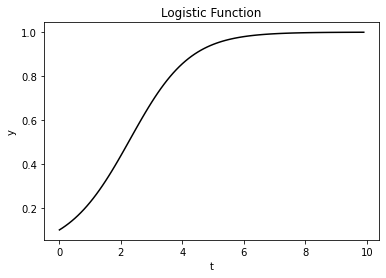

In [20]:
plt.plot(t, y, c='k')
plt.title("Logistic Function")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

### Exercise

1. write a version of `forward_euler` that will take in arguments in the same manner as `solve_ivp` (`f`, `tspan`,  `y0`, and `t_eval`).  You can define `h` for every step in `t_eval`.  Return a solution class which has fields `y` and `t`, just like `solve_ivp`.  Compare the output of your function to the output of `solve_ivp` on the logistic equation IVP above.  How accurate is either compared to a ground truth logistic function?

2. Try using some of the different methods in the [`solve_ivp` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).  How does your accuracy change in both the Logistic equation and growth equation?

## Events

You can ask `solve_ivp` to find the location of events. An event is defined as a function `event(t, y)`, and `solve_ivp` will find values of `t` where `event(t,y) = 0`.  For instance, in the zebra growth problem, we might want to find the value of `t` where the number of zebras reaches 100.  We can pass in an event or list of events using the `events` keyword.

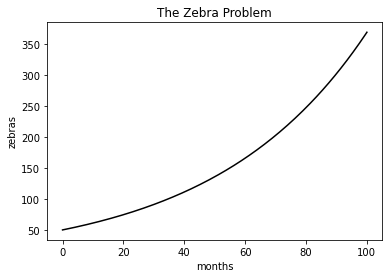

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

z0 = np.array([50])
alpha = 0.02

f = lambda t, z : alpha * z
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

def zebra100(t, y): 
    return y - 100

sol = solve_ivp(f, t_span, z0, t_eval=t_eval, events=zebra100)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("The Zebra Problem")
plt.ylabel("zebras")
plt.xlabel("months")
plt.show()

we can access the time at which events occur using the `t_events` field of the solution

In [22]:
sol.t_events

[array([34.65385735])]

If you want to end the simulation when an event occurs, you can set a flag `terminal=True`.  You can also specify a direction flag to only trigger an event when the root of the function goes from negative to positive (`direction=1`), or positive to negative (`direction=-1`)

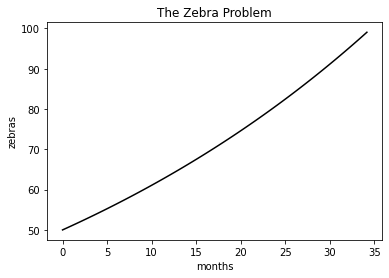

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

z0 = np.array([50])
alpha = 0.02

f = lambda t, z : alpha * z
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

def zebra100(t, y): 
    return y - 100

zebra100.terminal=True # we can set this a flag on the function object
zebra100.direction=1

sol = solve_ivp(f, t_span, z0, t_eval=t_eval, events=zebra100)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("The Zebra Problem")
plt.ylabel("zebras")
plt.xlabel("months")
plt.show()

In [24]:
sol.t_events

[array([34.65385735])]